<a href="https://colab.research.google.com/github/danielbehargithub/LinkedIn_Salary/blob/main/Wage_range_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# טען את הדאטה
data = pd.read_csv('salaries.csv')
data = data.drop(columns=["work_year", "salary", "salary_currency"])




In [ ]:
unique_jobs = data['job_title'].nunique()  # מספר המשרות הייחודיות
unique_job_titles = data['job_title'].unique()  # רשימת המשרות הייחודיות

print(f"Number of unique job titles: {unique_jobs}")
print(f"Unique job titles: {unique_job_titles}")


Distribution of Job Titles:
job_title
Security Engineer               9250
Security Analyst                2648
Software Engineer               1207
Security Architect              1036
Consultant                       933
                                ... 
Principal Security Architect       1
Infosec Risk Manager               1
Security Analytics Lead            1
System Security Engineer           1
Concierge Security Engineer        1
Name: count, Length: 318, dtype: int64

Percentage of Job Titles:
job_title
Security Engineer               28.189188
Security Analyst                 8.069726
Software Engineer                3.678308
Security Architect               3.157189
Consultant                       2.843299
                                  ...    
Principal Security Architect     0.003047
Infosec Risk Manager             0.003047
Security Analytics Lead          0.003047
System Security Engineer         0.003047
Concierge Security Engineer      0.003047
Name: count, Leng

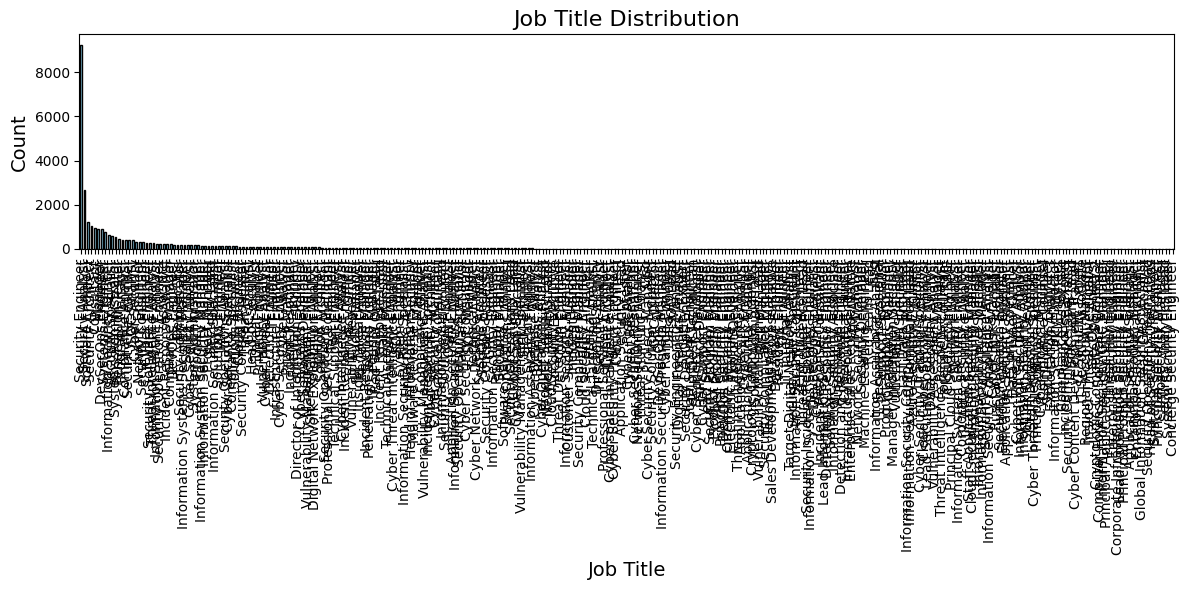


Imbalance Ratio (Max/Min): 9250.00


In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of records for each job title
job_counts = data['job_title'].value_counts()

# Calculate the percentage of records for each job title
job_percentage = (job_counts / len(data)) * 100

# Display the distribution of job titles
print("Distribution of Job Titles:")
print(job_counts)

print("\nPercentage of Job Titles:")
print(job_percentage)

# Visualize the distribution
plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Job Title Distribution", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Check for imbalance
imbalance_ratio = job_counts.max() / job_counts.min()
print(f"\nImbalance Ratio (Max/Min): {imbalance_ratio:.2f}")

if imbalance_ratio > 10:
    print("Warning: Significant imbalance detected!")
else:
    print("The data is relatively balanced.")


In [40]:
# קביעת חסם מינימלי
min_threshold = 50

# ספירת התפקידים
job_counts = data['job_title'].value_counts()

# סינון תפקידים מתחת לחסם
filtered_data = data[data['job_title'].isin(job_counts[job_counts >= min_threshold].index)]

# קיבוץ תפקידים נדירים כקטגוריה "Other"
data['job_title_filtered'] = data['job_title'].apply(
    lambda x: x if job_counts[x] >= min_threshold else 'Other'
)

# בדיקת התוצאה
print(f"Total records before filtering: {len(data)}")
print(f"Total records after filtering: {len(filtered_data)}")
print(f"Number of unique job titles before: {len(job_counts)}")
print(f"Number of unique job titles after: {filtered_data['job_title'].nunique()}")


Total records before filtering: 32814
Total records after filtering: 30124
Number of unique job titles before: 318
Number of unique job titles after: 86


Distribution of Job Titles:
job_title
Security Engineer               9250
Security Analyst                2648
Software Engineer               1207
Security Architect              1036
Consultant                       933
                                ... 
IT Audit Manager                  54
Reverse Engineer                  54
Incident Response Manager         52
Penetration Testing Engineer      52
IT Security Manager               51
Name: count, Length: 86, dtype: int64

Percentage of Job Titles:
job_title
Security Engineer               30.706413
Security Analyst                 8.790333
Software Engineer                4.006772
Security Architect               3.439118
Consultant                       3.097198
                                  ...    
IT Audit Manager                 0.179259
Reverse Engineer                 0.179259
Incident Response Manager        0.172620
Penetration Testing Engineer     0.172620
IT Security Manager              0.169300
Name: count, Lengt

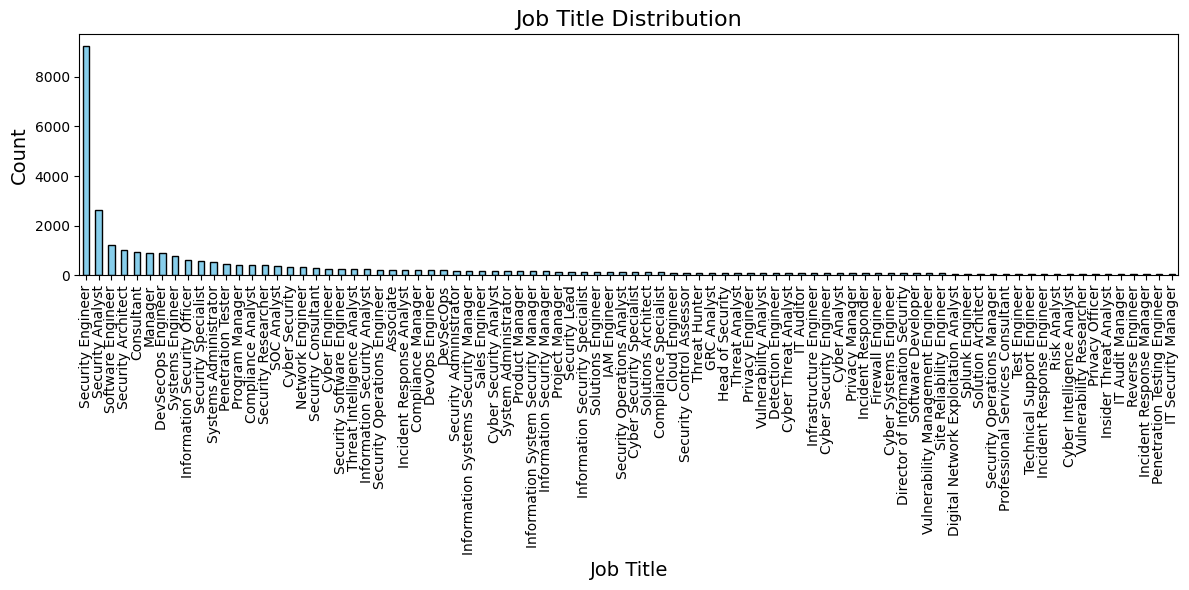


Imbalance Ratio (Max/Min): 181.37


In [41]:

# Count the number of records for each job title
job_counts = filtered_data['job_title'].value_counts()

# Calculate the percentage of records for each job title
job_percentage = (job_counts / len(filtered_data)) * 100

# Display the distribution of job titles
print("Distribution of Job Titles:")
print(job_counts)

print("\nPercentage of Job Titles:")
print(job_percentage)

# Visualize the distribution
plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Job Title Distribution", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Check for imbalance
imbalance_ratio = job_counts.max() / job_counts.min()
print(f"\nImbalance Ratio (Max/Min): {imbalance_ratio:.2f}")

if imbalance_ratio > 10:
    print("Warning: Significant imbalance detected!")
else:
    print("The data is relatively balanced.")


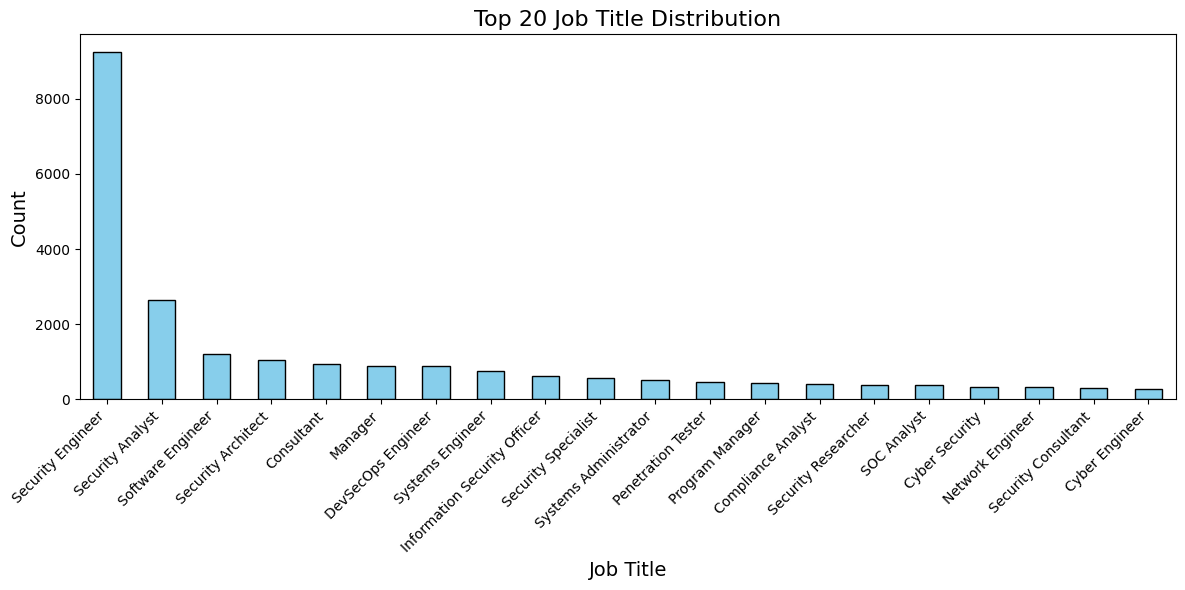

In [42]:
# Visualize the top 20 job titles for a clearer view
plt.figure(figsize=(12, 6))
job_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 20 Job Title Distribution", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
!pip install lightgbm
!pip install --upgrade lightgbm


In [81]:
# זיהוי עמודות טקסטואליות
categorical_columns = [
    'experience_level', 'employment_type', 'employee_residence',
    'company_location', 'company_size', 'job_title', 'remote_ratio'
]

# המרת עמודות לקטגוריות
for col in categorical_columns:
    data[col] = data[col].astype('category')

# בדיקה
print(data.dtypes)


experience_level      category
employment_type       category
job_title             category
salary_in_usd            int64
employee_residence    category
remote_ratio          category
company_location      category
company_size          category
dtype: object


In [82]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# הפרדת משתנים תלויים ובלתי תלויים
X = data.drop(columns=['salary_in_usd'])  # הסרת עמודת המטרה
y = data['salary_in_usd']

# חלוקה לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת דאטה ל-LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_columns)

# פרמטרים למודל
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# אימון המודל
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=3),
        ]
)

# חיזוי
y_pred = model.predict(X_test, num_iteration=model.best_iteration)



Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[75]	training's rmse: 54380.6	valid_1's rmse: 54283.1


In [84]:
# חישוב MSE
mse = mean_squared_error(y_test, y_pred)

# חישוב RMSE ידנית
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Squared Error: 2946656412.27
Root Mean Squared Error: 54283.11


In [69]:
# חישוב MAE
mae = mean_absolute_error(y_test, y_pred)

# חישוב RMSE באופן ידני
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 41307.650263546755
Root Mean Squared Error: 54262.18268841973


In [70]:
# חישוב טווח השכר
salary_min = data['salary_in_usd'].min()
salary_max = data['salary_in_usd'].max()
salary_mean = data['salary_in_usd'].mean()

print(f"Minimum Salary: {salary_min}")
print(f"Maximum Salary: {salary_max}")
print(f"Mean Salary: {salary_mean}")


Minimum Salary: 15061
Maximum Salary: 720000
Mean Salary: 146426.01289083928


In [71]:
relative_rmse = (rmse / salary_mean) * 100
print(f"Relative RMSE: {relative_rmse:.2f}%")


Relative RMSE: 37.06%


In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np

# חיזוי ממוצע השכר
baseline_pred = [salary_mean] * len(y_test)

# חישוב RMSE למודל הבסיסי
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"Baseline RMSE: {baseline_rmse:.2f}")


Baseline RMSE: 62877.04


In [73]:
salary_std = data['salary_in_usd'].std()
print(f"Standard Deviation of Salary: {salary_std}")


Standard Deviation of Salary: 63675.99206590069


In [74]:
# תחזיות של המודל ונתוני אמת
predictions = pd.DataFrame({
    'job_title': X_test['job_title'],  # משרות בסט הבדיקה
    'actual_salary': y_test,          # שכר אמיתי
    'predicted_salary': y_pred        # תחזיות המודל
})

# חישוב שגיאות לפי משרה
results = []
for job in predictions['job_title'].unique():
    job_data = predictions[predictions['job_title'] == job]
    mse = mean_squared_error(job_data['actual_salary'], job_data['predicted_salary'])
    rmse = np.sqrt(mse)
    mean_actual = job_data['actual_salary'].mean()
    relative_rmse = (rmse / mean_actual) * 100  # RMSE יחסית לממוצע השכר

    results.append({
        'job_title': job,
        'rmse': rmse,
        'relative_rmse': relative_rmse,
        'mean_actual_salary': mean_actual,
        'count': len(job_data)
    })

# הפיכת התוצאות ל-DataFrame
results_df = pd.DataFrame(results)

# מיון לפי RMSE יחסית
results_df = results_df.sort_values(by='relative_rmse', ascending=False)

# הצגת תוצאות
print("Accuracy by Job Title:")
print(results_df)

# שמירת התוצאות לקובץ
results_df.to_csv("job_title_accuracy.csv", index=False)


Accuracy by Job Title:
                               job_title          rmse  relative_rmse  \
222         Cloud Cyber Security Analyst  34873.623291     211.380915   
173          Offensive Security Engineer  55038.903964     171.156837   
226               IT Security Specialist  36465.438152     145.861753   
76          Information Security Advisor  66059.693163     140.783183   
202                 Help Desk Technician  72312.154686     133.911398   
..                                   ...           ...            ...   
237  Staff Application Security Engineer   5297.819354       2.943233   
192                       Ethical Hacker   3026.004333       2.898666   
136                          QA Engineer   3687.845314       2.836804   
210             Russian OSINT Specialist   1588.408173       0.979592   
203            Cyber Security Consultant    226.993371       0.242126   

     mean_actual_salary  count  
222             16498.0      1  
173             32157.0      2  
2

In [91]:
# שימוש במודל שכבר אומן (להחליף ב-lightgbm או בכל מודל מאומן)
# לדוגמה:
# model = your_trained_model

# נתונים למשתמש חדש
new_user = pd.DataFrame({
    'experience_level': ['SE'],         # Senior level
    'employment_type': ['FT'],          # Full-time
    'employee_residence': ['US'],       # Residence in the US
    'company_location': ['US'],         # Company located in the US
    'company_size': ['L'],              # Large company
    'job_title': ['Data Scientist'],    # Job title
    'remote_ratio': [100]               # Fully remote
})

# עמודות קטגוריאליות
categorical_columns = [
    'experience_level', 'employment_type', 'employee_residence',
    'company_location', 'company_size', 'job_title', 'remote_ratio'
]

# המרת עמודות לקטגוריה
for col in categorical_columns:
    if col in new_user.columns:
        new_user[col] = new_user[col].astype('category')

# התאמת עמודות למבנה סט האימון
for col in X_train.columns:
    if col not in new_user.columns:
        new_user[col] = 0  # הוספת עמודות חסרות

# סידור העמודות לפי סדר סט האימון
new_user = new_user[X_train.columns]

# חיזוי שכר (באמצעות מודל שאומן מראש)
predicted_salary = model.predict(new_user)[0]
print(f"Predicted Salary for the new user: ${predicted_salary:,.2f}")


Predicted Salary for the new user: $181,567.69


In [92]:
def categorize_experience(profile_text):
    """
    פונקציה שממפה קטגוריית ניסיון (EN, MI, SE, EX) על סמך שנות ניסיון מתוכן הטקסט.
    :param profile_text: טקסט פרופיל משתמש (string)
    :return: קטגוריית ניסיון (string)
    """
    import re

    # חיפוש שנות ניסיון בטקסט (למשל: '2 yrs', '10 years', '1 yr')
    experience_matches = re.findall(r"(\d+)\s*(?:yrs?|years?)", profile_text)

    # המרה למספרים של שנות ניסיון
    years_of_experience = sum(map(int, experience_matches))

    # קטגוריות ניסיון לפי מספר שנים
    if years_of_experience < 2:
        return 'EN'  # Entry Level
    elif 2 <= years_of_experience < 5:
        return 'MI'  # Mid Level
    elif 5 <= years_of_experience < 10:
        return 'SE'  # Senior Level
    else:
        return 'EX'  # Executive Level


# קריאה לדוגמה עם טקסט מהפרופיל שסיפקת
profile_text = """
Company       : Next Career
Duration      : 2 yrs 1 mo
--------------------------------------------------
  Job Title    : Career Coach
  Job Duration : 2024 - Present · 1 yr 1 mo
  --------------------------------------------------
  Job Title    : Owner
  Job Duration : 2023 - Present · 2 yrs 1 mo
  --------------------------------------------------
  Job Title     : Global Sourcing Manager
  Job Duration  : 2021 - 2023 · 2 yrs
  --------------------------------------------------
  Job Title     : Director Talent Acquisition
  Job Duration  : 2019 - 2021 · 2 yrs
  --------------------------------------------------
"""

# הפעלת הפונקציה
experience_category = categorize_experience(profile_text)
print(f"Experience Category: {experience_category}")


Experience Category: SE


In [94]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.0 MB/s eta 0:00:00


In [95]:
import pycountry
import re

def extract_job_details_with_iso(job_text):
    """
    חלץ פרטי משרה מתוך טקסט נתון והמר מיקום החברה ל-ISO 3166 Country Code באמצעות pycountry
    :param job_text: טקסט עם פרטי משרה
    :return: מילון עם פרטי המשרה, כולל ISO Country Code
    """

    # חילוץ כותרת המשרה
    job_title = re.search(r"Job Title\s*:\s*(.+)", job_text)
    job_title = job_title.group(1).strip() if job_title else "N/A"

    # חילוץ שם החברה
    company_name = re.search(r"Company\s*:\s*(.+)", job_text)
    company_name = company_name.group(1).strip() if company_name else "N/A"

    # חילוץ מיקום החברה
    company_location = re.search(r"Location\s*:\s*(.+)", job_text)
    company_location = company_location.group(1).strip() if company_location else "N/A"

    # המרת מיקום החברה ל-ISO 3166 Country Code
    country_code = "N/A"
    for country in pycountry.countries:
        if country.name in company_location:
            country_code = country.alpha_2
            break

    # עבודה מהבית: הגדרה לפי תנאים
    if "Remote" in job_text:
        remote_ratio = 100
    elif "Hybrid" in job_text:
        remote_ratio = 50
    elif "On-site" in job_text:
        remote_ratio = 0
    else:
        remote_ratio = "N/A"

    # הרכבת התוצאה
    return {
        "job_title": job_title,
        "company_name": company_name,
        "company_location": company_location,
        "iso_country_code": country_code,
        "remote_ratio": remote_ratio,
        "company_size": "N/A"  # יכול להיות מוגדר על פי מידע נוסף
    }


# קריאה לדוגמה עם הטקסט שסיפקת
job_text = """
Job Title    : Computer Vision Algorithm Engineer
Company      : Camtek
Location     :  Migdal HaEmek, North District, Israel
Description  : Camtek designs, develops, manufactures and markets technologically advanced, cost-effective systems and related software products that are used to enhance processes and yields serving the Advanced Packaging, Memory, CMOS Image Sensors, MEMS, RF, and other segments in the Semiconductors industry.
"""

# הפעלת הפונקציה
job_details = extract_job_details_with_iso(job_text)

# הצגת התוצאה
print(job_details)


{'job_title': 'Computer Vision Algorithm Engineer', 'company_name': 'Camtek', 'company_location': 'Migdal HaEmek, North District, Israel', 'iso_country_code': 'IL', 'remote_ratio': 'N/A', 'company_size': 'N/A'}


In [120]:
new_user = pd.DataFrame({
    'experience_level': [experience_category],         # Senior level
    'company_location': [job_details["iso_country_code"]],         # Company located in the US
    'job_title': [job_details["job_title"]],    # Job title
})



# עמודות קטגוריאליות
categorical_columns = [
    'experience_level', 'employment_type', 'employee_residence',
    'company_location', 'company_size', 'job_title', 'remote_ratio'
]

# המרת עמודות לקטגוריה
for col in categorical_columns:
    if col in new_user.columns:
        new_user[col] = new_user[col].astype('category')

# ווידוא עמודות רלוונטיות לפי X_train
for col in X_train.columns:
    if col not in new_user.columns:
        # הוספת עמודה קטגוריאלית עם ערך ברירת מחדל 'Unknown'
        new_user[col] = "Unknown"
        new_user[col] = new_user[col].astype('category')
        new_user[col] = new_user[col].cat.set_categories(list(X_train[col].cat.categories) + ["Unknown"])

# סידור העמודות לפי הסדר של X_train
new_user = new_user[X_train.columns]

# חיזוי שכר
predicted_salary = model.predict(new_user)[0]
print(f"Predicted Salary for the new user: ${predicted_salary:,.2f}")


Predicted Salary for the new user: $80,230.53


In [113]:
new_user

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,SE,Unknown,Computer Vision Algorithm Engineer,Unknown,Unknown,IL,Unknown


In [121]:
def calculate_salary_range_custom(predicted_salary, match_percentage, shift_low=0.1, shift_high=0.2):
    """
    חישוב טווח שכר שבו התאמה גבוהה מובילה לטווח שכר גבוה יותר
    :param predicted_salary: שכר חזוי
    :param match_percentage: אחוז התאמה למשרה
    :param shift_low: מקדם העלאה לתחתית הטווח (ברירת מחדל: 10%)
    :param shift_high: מקדם העלאה לחלק העליון של הטווח (ברירת מחדל: 20%)
    :return: גבול תחתון ועליון לטווח השכר
    """
    if match_percentage >= 80:
        lower_bound = predicted_salary * (1 + shift_low)  # טווח גבוה יותר לתחתית
        upper_bound = predicted_salary * (1 + shift_high)  # טווח גבוה יותר לחלק העליון
    else:
        lower_bound = predicted_salary * (1 - shift_low)  # טווח נמוך יותר לתחתית
        upper_bound = predicted_salary * (1 + shift_low)  # טווח נמוך יותר לחלק העליון

    return lower_bound, upper_bound


# דוגמה לשימוש
predicted_salary = predicted_salary  # תחזית שכר לדוגמה
match_percentage = 85       # אחוז התאמה לדוגמה

# חישוב טווח השכר
lower_salary, upper_salary = calculate_salary_range_custom(predicted_salary, match_percentage)

# הצגת התוצאה
print(f"Predicted Salary: ${predicted_salary:,.2f}")
print(f"Salary Range (Match Percentage = {match_percentage}%): ${lower_salary:,.2f} - ${upper_salary:,.2f}")


Predicted Salary: $80,230.53
Salary Range (Match Percentage = 85%): $88,253.58 - $96,276.64
